# **Analyse de sentiments sur les films du TOP 100 box office (Notebook principal)**
**Projet Python - 2A ENSAE**

AUMONT Louis-Armand, KHAIRALDIN Ahmed, GIMENES Vincent

## Introduction

L'objectif de ce Notebook va être de: 
+ **1)** Charger la base de données, puis nettoyer les commentaires pour les "tokenisés" et enfin les "lemmatisés"
+ **2)** Appliquer des algorithmes de NLP sur nos commentaires "lemmatisés" afin de déduire pour chaque commentaire un score de polarité
+ **3)** Procéder à une analyse de statistique descriptive avec nos variables et visualiser des relations entre elles
+ **4)** Modéliser pour tenter d'analyser les relations entre nos variables (linéaires, quadratiques), si pas de relation apparente, tester statistiquement la non-corrélation


### Traitement des données et analyse de sentiments

Avant de pouvoir faire de l'analyse de sentiment pour chaque commentaire, il faut d'abord les nettoyer pour les rendre lisibles pour l'ordinateur. Premièrement, nous allons transformer le fichier data_reviews en une base de données où chaque observation est un commentaire. Puis, nous allons nettoyer chaque commentaire en utilisant des fonctions permettant de supprimer la ponctuation, les stop-words et la lemmatisation.



####  Download Library ⚙️

In [1]:
!pip install spacy
!pip install wordcloud
!pip install textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.2/65.2 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.6/181.6 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 22.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.9/156.9 kB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.0/493.0 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.6/920.6 kB 15.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 16.3 MB/s eta 0:00:0000:010:01
   ━━━━━

####  Import Library 📦

In [2]:
# Importation de packages nécessaires

import pandas as pd
import json
import nltk
import spacy
import matplotlib.pyplot as plt
import seaborn as sns 

# Style
sns.set_style('darkgrid')

from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer

In [3]:
# Téléchargement d'éléments nécessaires à la tokenisation
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Download the VADER lexicon for sentiment analysis
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /home/onyxia/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /home/onyxia/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /home/onyxia/nltk_data...
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/onyxia/nltk_data...


True

## **1.** Création de la base de données des commentaires

### **1.1** Création du DataFrame

In [4]:
# Transformation du fichier json en un Dataframe Pandas

# Charger le fichier JSON
with open("data_reviews.json", 'r') as file:
    data = json.load(file)

In [5]:
movie_name = []
comments = []
notes = []
year= []
budget=[]
recette=[]
duree=[]

for movie, dico in data.items():
    if '0' in dico and isinstance(dico['0'], list):  # Vérifier si la clé '0' est une liste
        for comment in dico['0']:
            movie_name.append(movie)
            comments.append(comment)
            year.append(dico['1'])
            notes.append(dico['2'])
            budget.append(dico['3'])
            recette.append(dico['4'])
            duree.append(dico['5'])

df = pd.DataFrame({
    'Film': movie_name,
    'Commentaire': comments,
    'Annee':year,
    'Note imdb': notes,
    'Budget':budget,
    'Box office':recette,
    'duree':duree
})

df.sample(5)

,Film,Commentaire,Annee,Note imdb,Budget,Box office,duree
14247,Spider-Man: Homecoming (2017),Salvager Adrian Toomes (Michael Keaton) holds ...,2017,"7,4",175000000,880166924,2h 13m
7260,Toy Story 3 (2010),Toy Story 3 will go down in history as being o...,2010,"8,3",200000000,1067316101,1h 43m
10914,Pirates des Caraïbes : Jusqu'au bout du monde ...,Go Enjoy the Movie Its Definitely Worth Buying...,2007,"7,1",300000000,961691209,2h 49m
17724,Shrek le troisième (2007),There is good things and bad things about this...,2007,"6,1",160000000,813367380,1h 33m
17730,Shrek le troisième (2007),I hated the first Shrek because it was crude a...,2007,"6,1",160000000,813367380,1h 33m


### **1.2** Nettoyage des commentaires

#### **1.2.1** Tokenisation et suppression de la ponctuation

Il faut executer la cellule ci-dessous pour pouvoir charger le modèle de la langue anglaise de scapy.

In [6]:
# permet d'afficher un commentaire même si il est très long
pd.set_option('display.max_colwidth', None)

In [7]:
#oOn retire les "\n" dans les commentaires
df["Commentaire"] = df["Commentaire"].str.replace('\n','')
df["Commentaire"].sample()

2246    This movie was unfortunately set up to fail. When a movie is stupidly successful like the first movie was a sequel will really struggle and I think this one does.This movies plot is more complex than the originals and I don't think it does it any favours. It adds elements that are so unnecessary like a forbidden love for characters that we haven't really met or care about.It also really leaves most of its characters out to dry. Everyone apart from Elsa is completely useless in this movie they could literally have been cut and nothing would have mattered and it's a shame that they didn't find anything to do with them apart from them dealing with their own issues that are strange and trivial and nothing to do with the original plot and don't really have a resolution.The songs are really nothing to write home about. They are really boring and charmless. The original movies songs had such character and life and these songs are just like "well I guess we have to sing now". They had 

In [8]:
pd.set_option('display.max_colwidth', 100)

In [9]:
!python3 -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 13.2 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [10]:
# On commence par charger le modèle de la langue anglaise de Spacy (les commentaires sont en anglais)
nlp = spacy.load('en_core_web_sm')

# Fonction qui prend en argument un commentaire (chaîne de caractère) et qui retourne une liste des tokens sans les stopwords et la ponctuation
def tokenize(text):
    doc = nlp(text)
    tokens = [token.text for token in doc if not token.is_stop and not token.is_punct]
    return tokens

In [11]:
%%time
# On crée une nouvelle colonne avec la liste des tokens pour chaque commentaire
df['Tokens'] = df['Commentaire'].apply(tokenize)
df.sample(5)

CPU times: user 10min 35s, sys: 690 ms, total: 10min 36s
Wall time: 10min 36s


,Film,Commentaire,Annee,Note imdb,Budget,Box office,duree,Tokens
469,Avatar : La Voie de l'eau (2022),"In short: this was a waste of time movie, confusing plot, generic acting, all computerized, 300 ...",2022,"7,6",350000000,2320250281,3h 12m,"[short, waste, time, movie, confusing, plot, generic, acting, computerized, 300, million, dollar..."
12565,Shrek 2 (2004),"Memo to all Screenwriters:If you ever intend on writing a sequel to a wildly successful film, us...",2004,"7,3",150000000,928760770,1h 33m,"[Memo, Screenwriters, intend, writing, sequel, wildly, successful, film, use, Shrek, 2, guide, W..."
15839,Thor: Ragnarok (2017),"Some humor is welcome in a superhero movie, but TR is so determined to ladle out the yuks that i...",2017,"7,9",180000000,855301806,2h 10m,"[humor, welcome, superhero, movie, TR, determined, ladle, yuks, forgets, superhero, movie, Thor,..."
10567,Le Livre de la jungle (2016),I watched this movie in theaters and was blown away. I don't remember too much of the original a...,2016,"7,4",175000000,967724775,1h 46m,"[watched, movie, theaters, blown, away, remember, original, animated, film, nice, refresher, CGI..."
7344,Toy Story 3 (2010),The Greatest Movie Ever Made with the best villain and ending ever. It can be enjoyed by people ...,2010,"8,3",200000000,1067316101,1h 43m,"[Greatest, Movie, best, villain, ending, enjoyed, people, ages, cry, time, watch, movie, movie, ..."


Avec Spacy, l'algortihme s'exécute en près de 11 min pour l'ensemble de la base de données. Nous avons utilisé Spacy et non nltk pour la tokenization et la suppression des stopwords, puisque Spacy a un répertoire plus important de stopwords et a de meilleures performances pour les textes volumineux.

#### **1.2.2** Lemmatisation des commentaires   
Nous allons désormais procéder à la lemmatisation des commentaires pour pouvoir allèger les algorithmes de NLP plus tard.

In [12]:
# Fonction qui prend en argument une liste de tokens et qui retourne ces tokens lemmatisés
def lemm(tokens):
    # D'abord, on transforme la liste en doc Spacy
    tokens_as_doc = spacy.tokens.Doc(nlp.vocab, words=tokens)
    # Lemmatisation du doc 
    lemmatized = [token.lemma_ for token in tokens_as_doc]
    return lemmatized
# Le lemma_ de Spacy ne reconnait pas les tokens et renvoie des listes vides (Pourquoi ?)

lemmatizer = WordNetLemmatizer()

def lemm2(tokens):
    lemmatized = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized



In [13]:
# On crée une nouvelle colonne des tokens lemmatisés
df['Tokens lemmatisés'] = df['Tokens'].apply(lemm2)
df.sample(5)

,Film,Commentaire,Annee,Note imdb,Budget,Box office,duree,Tokens,Tokens lemmatisés
6973,Star Wars: L'Ascension de Skywalker (2019),So glad I didn't pay to see this. This was the dictionary definition of mediocre effort. When a ...,2019,"6,4",275000000,1077022372,2h 21m,"[glad, pay, dictionary, definition, mediocre, effort, Star, Wars, streaming, network, kicks, pan...","[glad, pay, dictionary, definition, mediocre, effort, Star, Wars, streaming, network, kick, pant..."
12249,Harry Potter et l'Ordre du Phénix (2007),"""What makes Harry and buds more interesting than ever is that they care more deeply about each o...",2007,"7,5",150000000,939288806,2h 18m,"[makes, Harry, buds, interesting, care, deeply, time, figure, strategies, way, intelligent, adul...","[make, Harry, bud, interesting, care, deeply, time, figure, strategy, way, intelligent, adult, s..."
4235,Les Indestructibles 2 (2018),Resolutions to problems are unimaginative and the orchestration of speech to animation is unnatu...,2018,"7,6",200000000,1243225667,1h 58m,"[Resolutions, problems, unimaginative, orchestration, speech, animation, unnatural, Lines, deliv...","[Resolutions, problem, unimaginative, orchestration, speech, animation, unnatural, Lines, delive..."
11134,Le Hobbit: La Désolation de Smaug (2013),"Don't know about Desolation of Smaug, I feel pretty desolate having watched that film. Had Peter...",2013,"7,8",225000000,959027992,2h 41m,"[know, Desolation, Smaug, feel, pretty, desolate, having, watched, film, Peter, Jackson, read, b...","[know, Desolation, Smaug, feel, pretty, desolate, having, watched, film, Peter, Jackson, read, b..."
3924,La Belle et la Bête (2017),This movie is very overrated and the reason why the film is popular because of its promotion. Em...,2017,"7,1",160000000,1266115964,2h 9m,"[movie, overrated, reason, film, popular, promotion, Emma, Watson, performance, boring, hell, vo...","[movie, overrated, reason, film, popular, promotion, Emma, Watson, performance, boring, hell, vo..."


### **1.3** Représentation des mots

Maintenant, visualisons pour certains commentaires les mots les plus représentés après nettoyage des commentaires.

Commençons d'abord par visualiser un premier nuage de mots d'un commentaire quelconque.

In [14]:
# Fonction qui prend en argument une liste de tokens et qui retourne le nuage de mots correspondant.

def cloud(tokens):
    text = " ".join(tokens)
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    return wordcloud

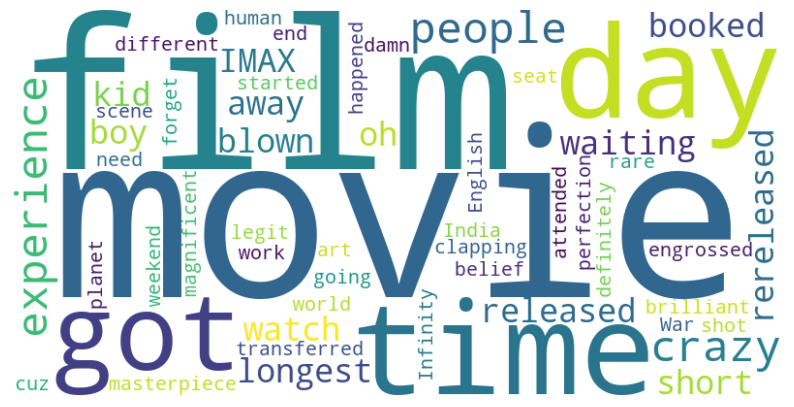

In [15]:
plt.figure(figsize=(10, 8))
plt.imshow(cloud(df['Tokens lemmatisés'][0]), interpolation='bilinear')
plt.axis("off")
plt.show()

Par exemple, pour le premier commentaire de la bdd, on peut dès à présent avoir une idée sur son avis vis à vis du film grâce à ce nuage de mots, de par la présence de mots tels que 'masterpiece, 'magnificent', 'perfection'... qui sont assez représentés. Néanmoins, comme nous avons utilisé nltk, le lemmatiseur ne reconnait pas les entités nommés telles que 'IMAX', 'India'... .

## **2.** NLP et analyse de sentiments

In [16]:
#Convertir les commentaires en string.
def string_function(column):
    return column.str.lower()

df['Commentaire'] =  string_function(df["Commentaire"])

Nous allons comparer les différents algorithmes proposés, notamment ceux des modules TextBlob, nltk et scapy.

On va dans un premier temps utiliser le module TextBlob

In [17]:
def analyze_sentiment_blob(tokens):
    text = ' '.join(tokens)
    blob = TextBlob(text)
    return blob.sentiment.polarity

In [18]:
# Appliquez la fonction à la colonne 'tokens_lemmatized' du DataFrame
df['sentiment_polarity_blob'] = df['Tokens lemmatisés'].apply(analyze_sentiment_blob)

On essaye maintenant avec la fonction SentimentIntensityAnalyzer de nltk

In [19]:
def analyze_sentiment_nltk(tokens):
    text = ' '.join(tokens)
    sia = SentimentIntensityAnalyzer()
    return sia.polarity_scores(text)['compound']

In [20]:
%%time
df['sentiment_polarity_nltk'] = df["Tokens lemmatisés"].apply(analyze_sentiment_nltk)

CPU times: user 1min 35s, sys: 92.1 ms, total: 1min 35s
Wall time: 1min 35s


On essaye enfin de faire de l'analyse de sentiment avec le module scapy.

La fonction ci-dessus ne fonctionne pas bien puisqu'elle retourne que des 0. Je la laisse au cas où on trouve le problème.

Les notes et les années sont sous forme de string. Nous changeons cela pour pourvoir faire des statistiques avec.

In [21]:
df.dtypes

Film                        object
Commentaire                 object
Annee                       object
Note imdb                   object
Budget                      object
Box office                  object
duree                       object
Tokens                      object
Tokens lemmatisés           object
sentiment_polarity_blob    float64
sentiment_polarity_nltk    float64
dtype: object

In [22]:
#change le type de la colonne 'Note imdb' en float
df['Note imdb'] = df['Note imdb'].str.replace(',', '.').astype(float)
df['Annee'] = df['Annee'].astype(float)
df["Budget"] = df["Budget"].astype(float)
df['Box office'] = df["Box office"].astype(float)

On groupe les observations selon le film.

In [23]:
grouped = df.groupby('Film')
df_grouped = grouped[["sentiment_polarity_nltk", "sentiment_polarity_blob",  'Note imdb', 'Annee', "Budget", "Box office"]].mean()

Il peut être interessant de regarder aussi la variance des scores

In [24]:
var_by_group = grouped[["sentiment_polarity_nltk", "sentiment_polarity_blob"]].var()

In [25]:
correlation = df_grouped['sentiment_polarity_nltk'].corr(df_grouped['Note imdb'])
print(f"La correlation entre les notes sur imbd et la moyenne des scores de la polarité des sentiments par film évalué avec la library nltk est de {correlation}")

La correlation entre les notes sur imbd et la moyenne des scores de la polarité des sentiments par film évalué avec la library nltk est de 0.3709966160559881


In [26]:
correlation = df_grouped['sentiment_polarity_blob'].corr(df_grouped['Note imdb'])
print(f"La correlation entre les notes sur imbd et la moyenne des scores de la polarité des sentiments par film évalué avec la library textblob est de {correlation}")

La correlation entre les notes sur imbd et la moyenne des scores de la polarité des sentiments par film évalué avec la library textblob est de 0.4733692708767008


In [27]:
correlation = df_grouped['sentiment_polarity_nltk'].corr(df_grouped['sentiment_polarity_blob'])
print(f"La correlation entre la moyenne des scores de la polarité des sentiments par film évalué avec la library nltk et la moyenne des scores de la polarité des sentiments par film évalué avec la library textblob est de {correlation}")

La correlation entre la moyenne des scores de la polarité des sentiments par film évalué avec la library nltk et la moyenne des scores de la polarité des sentiments par film évalué avec la library textblob est de 0.7417632126035837


Il y a une relation positive non négligeable entre les notes et le score des commentaires. Il y a également une forte corrélation entre les scores évalués par textblob et ceux évalués par nltk.

## **3.** Etude statistique du DataFrame

Nous allons séparer l'étude de notre DataFrame en deux temps:
- En premier lieu, analyse des variables numériques
- En second lieu, analyse statistique des commentaires

### **3.1** Variables numérique   
En premier lieu, on va regarder le type des variables de notre DataFrame afin de différencier les variables catégoriques, continues et textuelles

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17889 entries, 0 to 17888
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Film                     17889 non-null  object 
 1   Commentaire              17889 non-null  object 
 2   Annee                    17889 non-null  float64
 3   Note imdb                17889 non-null  float64
 4   Budget                   17889 non-null  float64
 5   Box office               17889 non-null  float64
 6   duree                    17889 non-null  object 
 7   Tokens                   17889 non-null  object 
 8   Tokens lemmatisés        17889 non-null  object 
 9   sentiment_polarity_blob  17889 non-null  float64
 10  sentiment_polarity_nltk  17889 non-null  float64
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


On va donc s'intéresser en premier lieu aux variables suivantes: Note imdb, Budget, Box Office

#### **3.1.1** Les notes

/tmp/ipykernel_267/3206841218.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_grouped['Note imdb'], palette="RdYlBu_r")


Text(0.5, 1.0, 'Répartition des notes moyennes des films de notre échantillon')

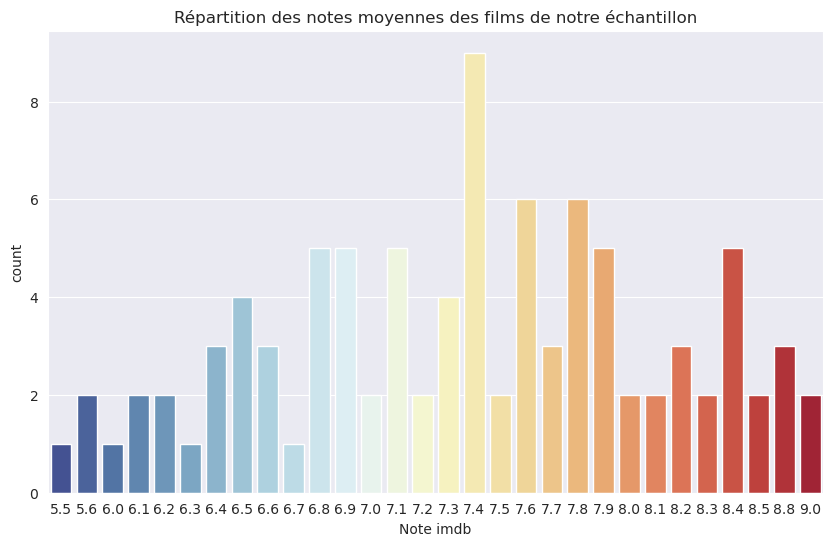

In [29]:
# Répartition de la note moyenne sur notre échantillon de 100 films
plt.figure(1, (10,6))
sns.countplot(x=df_grouped['Note imdb'], palette="RdYlBu_r")
plt.title('Répartition des notes moyennes des films de notre échantillon')

Les notes de notre échantillons semblent bien réparties en dans l'intervalle [5.5, 9.0], avec une forte concentration autour de 7.4, qui est la moyenne des notes de notre échantillon. 
La note minimale pour un film du top 100 sur IMDB est 5.5. La perfection ne semble pas atteignable aux yeux des spectateurs car la note maximale attribuée est de 9.0.

Nous allons maintenant nous intéresser à la distribution de ces notes.

/tmp/ipykernel_267/188193729.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=df_grouped['Note imdb'],kde=True, bins=30, palette="RdYlBu_r")


Text(0.5, 1.0, 'Distribution des notes moyennes des films de notre échantillon')

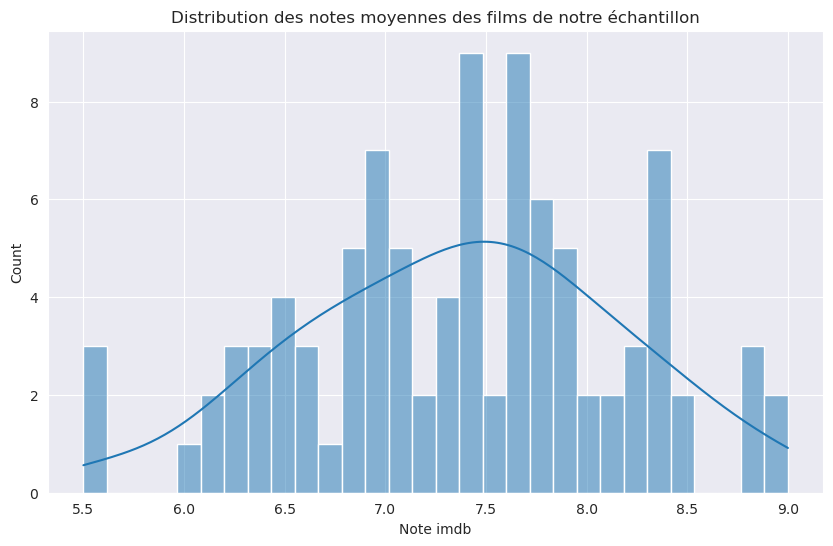

In [30]:
plt.figure(1, (10,6))
sns.histplot(x=df_grouped['Note imdb'],kde=True, bins=30, palette="RdYlBu_r")
plt.title('Distribution des notes moyennes des films de notre échantillon')

**test de noramlité? Jarque berra**

#### **3.1.2** Budget et Box-Office

In [31]:
df_grouped.head()

,sentiment_polarity_nltk,sentiment_polarity_blob,Note imdb,Annee,Budget,Box office
Film,,,,,,
007 Spectre (2015),0.545586,0.130661,6.8,2015.0,245000000.0,8.807053e+08
Aladdin (2019),0.624164,0.175002,6.9,2019.0,183000000.0,1.054304e+09
Alice au pays des merveilles (2010),0.723677,0.137034,6.4,2010.0,200000000.0,1.025468e+09
Aquaman (2018),0.276618,0.006167,6.8,2018.0,160000000.0,1.157347e+09
Avatar (2009),0.844516,0.213078,7.9,2009.0,237000000.0,2.923706e+09


In [32]:
# Création des variables budget et box_office
budget = df_grouped['Budget']
box_office = df_grouped['Box office']

**Statistiques du budget**

In [33]:
min_budget = df_grouped.index[df_grouped['Budget'] == df_grouped['Budget'].min()][0]
max_budget = df_grouped.index[df_grouped['Budget'] == df_grouped['Budget'].max()][0]

In [34]:
# Affichage des statistiques principales
print('=== *Statistiques Budget* ===')
print(f'Le budget moyen des 100 meilleurs films sur IMDB est de {round(budget.mean()/10**6)} millions de $')
print(f'Le film du top 100 au plus faible budget est {min_budget} et a un budget de {round(budget.min()/10**6)} millions de $')
print(f'Le film du top 100 au plus haut budget est {max_budget} et a un budget de {round(budget.max()/10**6)} millions de $')

=== *Statistiques Budget* ===
Le budget moyen des 100 meilleurs films sur IMDB est de 175 millions de $
Le film du top 100 au plus faible budget est Le Roi Lion (1994) et a un budget de 45 millions de $
Le film du top 100 au plus haut budget est Avengers: Endgame (2019) et a un budget de 356 millions de $


**Statistiques du Box-Office**

In [35]:
min_bo = df_grouped.index[df_grouped['Box office'] == df_grouped['Box office'].min()][0]
max_bo = df_grouped.index[df_grouped['Box office'] == df_grouped['Box office'].max()][0]

In [36]:
# Affichage des statistiques principales
print('=== *Statistiques Box office* ===')
print(f'Le revenu moyen des 100 meilleurs films sur IMDB est de {round(box_office.mean()/10**6)} millions de $')
print(f'Le film du top 100 au plus faible revenu est {min_bo} et a un revenu de {round(box_office.min()/10**6)} millions de $')
print(f'Le film du top 100 au plus haut revenu est {max_bo} et a un revenu de {round(box_office.max()/10**6)} millions de $')

=== *Statistiques Box office* ===
Le revenu moyen des 100 meilleurs films sur IMDB est de 1151 millions de $
Le film du top 100 au plus faible revenu est Shrek le troisième (2007) et a un revenu de 813 millions de $
Le film du top 100 au plus haut revenu est Avatar (2009) et a un revenu de 2924 millions de $


**Aperçu stylisé des statistiques ci-dessus**

<Axes: xlabel='Box office'>

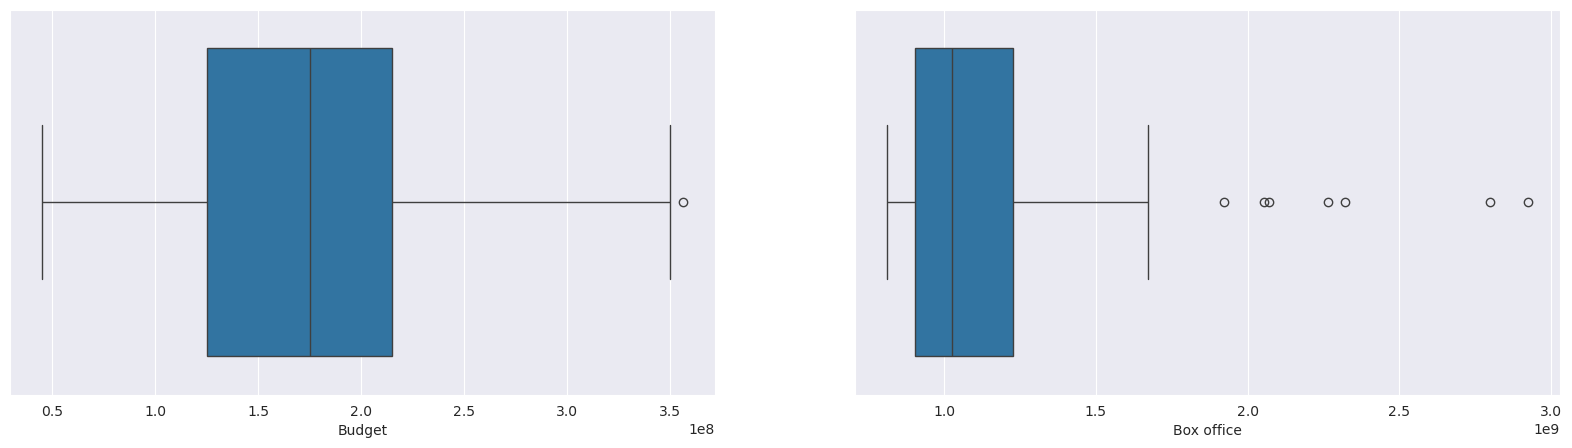

In [37]:
plt.figure(1, (20,5))

#1er boxplot
plt.subplot(1,2,1)
sns.boxplot(x=budget)

#2eme boxplot
plt.subplot(1,2,2)
sns.boxplot(x=box_office)

La boîte à moustache du budget nous permet de visualiser les statistiques décrites précédemment. De plus, 50% des films ont un budget compris entre 1.25 et 2.1 millons de $ avec un seul outlier.    
La boîte à moustache sur le Box-office nous montre une forte variance entre les revenus générés par les différents films avec de nombreux outliers qui ont des revenus buine plus élevés que la moyenne. 

**Les films aux revenus les plus importants ont-ils aussi les plus gros budgets ?**

In [38]:
# DataFrame avec revenus triés dans l'ordre croissant
temp = df_grouped.copy().sort_values(by = 'Box office')

# On affiche les 7 films outliers
temp.tail(7)

,sentiment_polarity_nltk,sentiment_polarity_blob,Note imdb,Annee,Budget,Box office
Film,,,,,,
Spider-Man: No Way Home (2021),0.662038,0.200781,8.2,2021.0,200000000.0,1.921847e+09
Avengers: Infinity War (2018),0.490697,0.160883,8.4,2018.0,321000000.0,2.052415e+09
Star Wars : Épisode VII - Le Réveil de la Force (2015),0.611374,0.172762,7.8,2015.0,245000000.0,2.071310e+09
Titanic (1997),0.731694,0.262590,7.9,1997.0,200000000.0,2.264743e+09
Avatar : La Voie de l'eau (2022),0.692707,0.134227,7.6,2022.0,350000000.0,2.320250e+09
Avengers: Endgame (2019),0.560758,0.203876,8.4,2019.0,356000000.0,2.799439e+09
Avatar (2009),0.844516,0.213078,7.9,2009.0,237000000.0,2.923706e+09


Sachant que le budget moyen est de 175 millions de dollars et le plus gros budget est de 356 millions de dollars, on remarque que les films les plus lucratifs sont ceux aux plus gros budget. Cette corrélation parait naturelle tant ces films peuvent avoir un budget marketing important et drainer les foules dans les salles de cinéma.

**Regression théorique du BO sur le budget: une étude économétrique**

### **3.2** Variables textuelles   
Après l'étude statistique des variables numériques, nous allons maintenant analyser les commentaires d'un point de vue statistique

In [39]:
df_grouped.head()

,sentiment_polarity_nltk,sentiment_polarity_blob,Note imdb,Annee,Budget,Box office
Film,,,,,,
007 Spectre (2015),0.545586,0.130661,6.8,2015.0,245000000.0,8.807053e+08
Aladdin (2019),0.624164,0.175002,6.9,2019.0,183000000.0,1.054304e+09
Alice au pays des merveilles (2010),0.723677,0.137034,6.4,2010.0,200000000.0,1.025468e+09
Aquaman (2018),0.276618,0.006167,6.8,2018.0,160000000.0,1.157347e+09
Avatar (2009),0.844516,0.213078,7.9,2009.0,237000000.0,2.923706e+09


In [40]:
df_grouped['sentiment_polarity_nltk'].var()

0.02640954180793746

In [41]:
df_grouped['sentiment_polarity_blob'].var()

0.004186892648272305

In [42]:
# NON UTILISE POUR LE MOMENT
temp = df_grouped.copy()[['sentiment_polarity_nltk', 'sentiment_polarity_blob', 'Note imdb']]
temp.reset_index(inplace=True)
temp.drop('Film', axis=1,inplace=True)
temp.head()

,sentiment_polarity_nltk,sentiment_polarity_blob,Note imdb
0,0.545586,0.130661,6.8
1,0.624164,0.175002,6.9
2,0.723677,0.137034,6.4
3,0.276618,0.006167,6.8
4,0.844516,0.213078,7.9


**Distribution de la polarité des commentaires**

 * **Avec Text_blob**

Text(0.5, 1.0, 'Distribution des polarités des sentiments avec Text Blob')

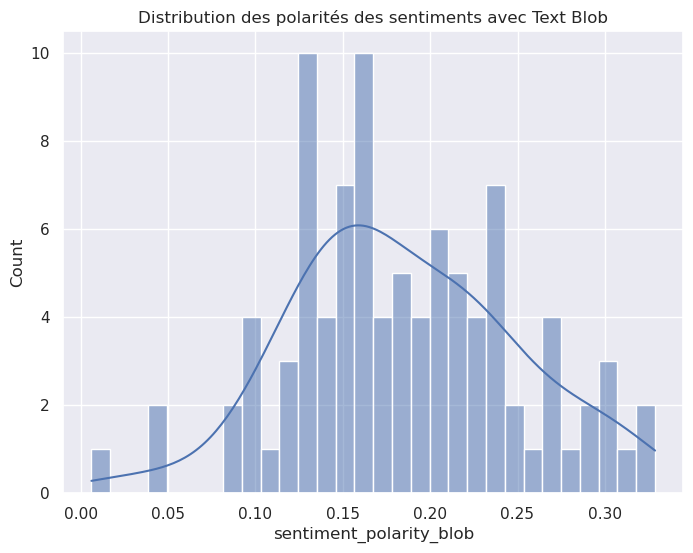

In [59]:
# Affichage de l'histogramme 
plt.figure(1, (8,6))
sns.histplot(df_grouped['sentiment_polarity_blob'],kde=True, bins=30)
plt.title('Distribution des polarités des sentiments avec Text Blob')

* **Avec NLTK**

Text(0.5, 1.0, 'Distribution des polarités des sentiments avec NLTK')

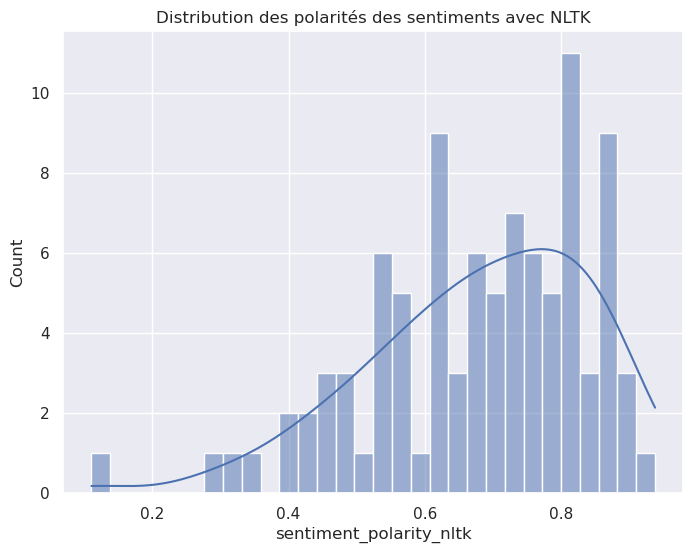

In [60]:
# Affichage de l'histogramme 
plt.figure(1, (8,6))
sns.histplot(df_grouped['sentiment_polarity_nltk'],kde=True, bins=30)
plt.title('Distribution des polarités des sentiments avec NLTK')

En comparant les deux histogrammes on remarque que les distributions sont bien différentes selon le modèle de NLP utilisé. En effet, la distribution des polarité avec Text_blob a une très faible variance et est très concentrée entre 0.10 et 0.25. En revanche, les polarités avec NLTK semble être normalement distribuée avec une présence de skewness pronnoncée. 

# Un peu de Visualisation

In [44]:
import seaborn as sns
sns.set_theme(style="darkgrid", palette="deep", color_codes=True)

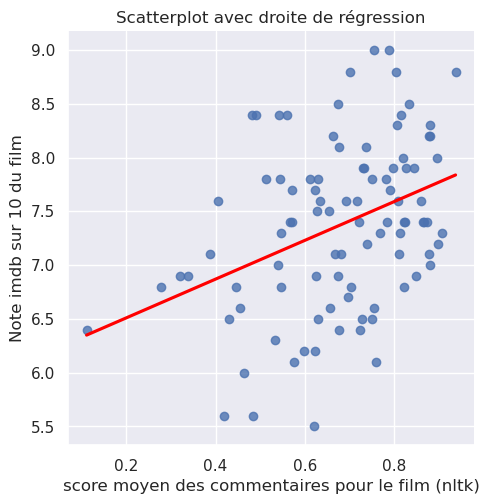

In [45]:
# Affichez le nuage de points
sns.lmplot(x='sentiment_polarity_nltk', y='Note imdb', data=df_grouped, line_kws={'color': 'red'}, ci=None)

# Ajout de titres et de labels
plt.title('Scatterplot avec droite de régression')
plt.xlabel('score moyen des commentaires pour le film (nltk)')
plt.ylabel('Note imdb sur 10 du film')

# Affichage du graphique
plt.show()

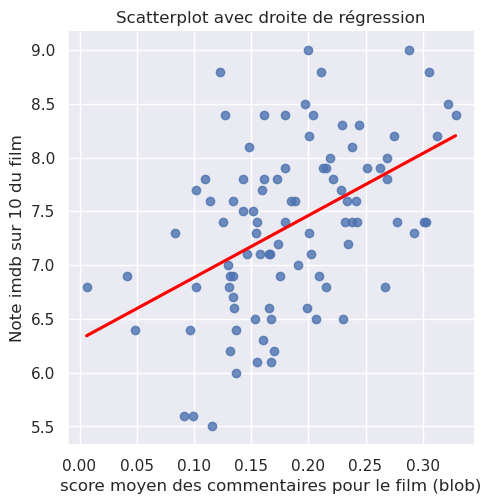

In [46]:
# Affichez le nuage de points
sns.lmplot(x='sentiment_polarity_blob', y='Note imdb', data=df_grouped, line_kws={'color': 'red'}, ci=None)

# Ajout de titres et de labels
plt.title('Scatterplot avec droite de régression')
plt.xlabel('score moyen des commentaires pour le film (blob)')
plt.ylabel('Note imdb sur 10 du film')

# Affichage du graphique
plt.show()

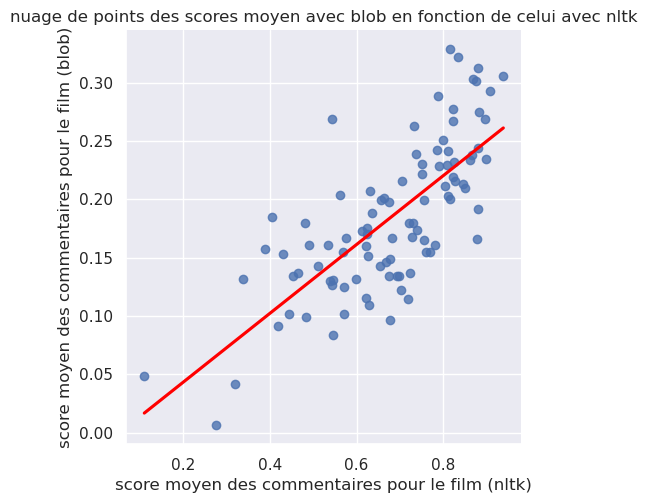

In [47]:
# Affichez le nuage de points
sns.lmplot(x='sentiment_polarity_nltk', y='sentiment_polarity_blob', data=df_grouped, line_kws={'color': 'red'}, ci=None)

# Ajout de titres et de labels
plt.title('nuage de points des scores moyen avec blob en fonction de celui avec nltk')
plt.xlabel('score moyen des commentaires pour le film (nltk)')
plt.ylabel('score moyen des commentaires pour le film (blob)')

# Affichage du graphique
plt.show()